In [1]:
import pandas as pd 
import os

In [2]:
# CSV for states fullname
states_fullname = pd.read_csv('static/data/statelatlong.csv').rename(columns={'State':'State Code','City': 'State'})
states_fullname.head()

,State Code,Latitude,Longitude,State
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [3]:
file_list = os.listdir("Data")

In [4]:
list_of_dataframes = []
for filename in file_list:
    list_of_dataframes.append(pd.read_table("Data/"+filename))

merged_df = pd.concat(list_of_dataframes)


C:\Users\ryana\anaconda3\envs\bcs\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ryana\anaconda3\envs\bcs\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ryana\anaconda3\envs\bcs\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# adding states full names to full dataset
merged_df = pd.merge(merged_df,states_fullname, on='State Code', how='outer')

In [6]:
merged_df.head()

,Analyte ID,Analyte Name,State Code,PWSID,System Name,System Type,Retail Population Served,Adjusted Total Population Served,Source Water Type,Water Facility ID,...,Detection Limit Code,Detect,Value,Unit,Presence Indicator Code,Residual Field Free Chlorine mg/L,Residual Field Total Chlorine mg/L,Latitude,Longitude,State
0,1005.0,ARSENIC,AL,AL0000943,GUNTERSVILLE WATER WORKS & SEWER BOARD,C,12750.0,13980.0,SW,1553.0,...,MDL,0.0,NaN,NaN,NaN,NaN,NaN,32.601011,-86.680736,Alabama
1,1005.0,ARSENIC,AL,AL0000091,BRENT UTILITIES BOARD,C,5850.0,6885.0,GW,4221.0,...,MDL,0.0,NaN,NaN,NaN,NaN,NaN,32.601011,-86.680736,Alabama
2,1005.0,ARSENIC,AL,AL0000933,ALBERTVILLE UTILITIES BOARD,C,30186.0,45915.0,SW,1665.0,...,MDL,0.0,NaN,NaN,NaN,NaN,NaN,32.601011,-86.680736,Alabama
3,1005.0,ARSENIC,AL,AL0000398,CULLMAN UTILITIES BOARD,C,32.0,31112.0,SW,1346.0,...,MDL,0.0,NaN,NaN,NaN,NaN,NaN,32.601011,-86.680736,Alabama
4,1005.0,ARSENIC,AL,AL0001780,FIVE STAR WATER SUPPLY DISTRICT,C,100.0,6040.0,SW,4793.0,...,MDL,0.0,NaN,NaN,NaN,NaN,NaN,32.601011,-86.680736,Alabama


In [7]:
# remove repeated values skewing dating
no_repeat_locations=merged_df.drop_duplicates(subset=['Analyte Name', 'System Name'])
# Shorten column list
clean_columns = no_repeat_locations[['Analyte ID', 'Analyte Name', 'State Code','State','Retail Population Served','Source Water Type','Sample Collection Date','Detection Limit Value','Detection Limit Unit','Detect', 'Value','Unit']]
# change units to uppercase and strip extra spaces to unify
clean_columns['Unit'] = clean_columns['Unit'].str.upper().str.rstrip()


C:\Users\ryana\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# unify all measurement for each contaminant if possible AND DROP FECAL COLIFORM
clean_columns.drop(clean_columns.index[clean_columns['Analyte Name'] == 'FECAL COLIFORM'], inplace = True)
clean_columns.loc[clean_columns['Analyte Name']=='ARSENIC', 'Unit'] ='MG/L'
clean_columns.loc[clean_columns['Analyte Name']=='ASBESTOS', 'Unit'] ='MFL'
clean_columns.loc[clean_columns['Analyte Name']=='CYANIDE', 'Unit'] ='MG/L'
clean_columns.loc[clean_columns['Analyte Name']=='MERCURY', 'Unit'] ='MG/L'
clean_columns.loc[clean_columns['Analyte Name']=='OXAMYL', 'Unit'] ='UG/L'
clean_columns.loc[clean_columns['Analyte Name']=='PICLORAM', 'Unit'] ='MG/L'
clean_columns.loc[clean_columns['Analyte Name']=='SELENIUM', 'Unit'] ='MG/L'
clean_columns.loc[clean_columns['Analyte Name']=='TOTAL POLYCHLORINATED BIPHENYLS (PCB)', 'Unit'] ='UG/L'

C:\Users\ryana\anaconda3\envs\bcs\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\ryana\anaconda3\envs\bcs\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
# unify all measurement for each contaminant if possible
clean_columns.groupby(['Analyte Name'])['Unit'].unique()


Analyte Name
ARSENIC                                  [MG/L]
ASBESTOS                                  [MFL]
CYANIDE                                  [MG/L]
FLUORIDE                                 [MG/L]
MERCURY                                  [MG/L]
OXAMYL                                   [UG/L]
PICLORAM                                 [MG/L]
SELENIUM                                 [MG/L]
TOTAL POLYCHLORINATED BIPHENYLS (PCB)    [UG/L]
Name: Unit, dtype: object

In [10]:
# Change null Values to 0 
clean_columns['Value'].fillna(0)

0          0.000
1          0.000
2          0.000
3          0.000
4          0.000
           ...  
1615962    0.000
1615963    0.000
1615964    0.001
1615967    0.420
1615968    0.000
Name: Value, Length: 332815, dtype: float64

In [11]:
clean_columns.to_csv('generate_sql/water_contamination.csv')

In [12]:
#group by contaminant and state
table_group = clean_columns.groupby(['State','Analyte Name'])['Value'].agg(['sum'])
table_group

sum
State   Analyte Name                                    
Alabama ARSENIC                                 0.008976
        ASBESTOS                                0.000000
        CYANIDE                                 0.286000
        FLUORIDE                               84.210000
        MERCURY                                 0.002016
...                                                  ...
Wyoming MERCURY                                 0.000300
        OXAMYL                                  0.000000
        PICLORAM                                1.160000
        SELENIUM                                0.157900
        TOTAL POLYCHLORINATED BIPHENYLS (PCB)   0.000000

[420 rows x 1 columns]

In [13]:
from matplotlib import pyplot as plt

In [14]:
#Locations with extreme levels of contaminants
arsenic = clean_columns.loc[clean_columns['Analyte Name']=='ARSENIC']
danger_levels_arsenic = arsenic[arsenic['Value']>=.2]
ext_caution_levels_arsenic = arsenic[(arsenic['Value']<.2) & (arsenic['Value'] >= .05)]
caution_levels_arsenic = arsenic[(arsenic['Value']<.5) & (arsenic['Value'] >= .01)]                               
                                 
selenium = clean_columns.loc[clean_columns['Analyte Name']=='SELENIUM']
danger_levels_selenium = selenium[selenium['Value']>=15]
ext_caution_levels_selenium= selenium[(selenium['Value']<15) & (selenium['Value'] >= 2.5)]
caution_levels_selenium =selenium[(selenium['Value']<2.5) & (selenium['Value'] >= .04)] 

mercury = clean_columns.loc[clean_columns['Analyte Name']=='MERCURY']
danger_levels_mercury = mercury[mercury['Value']>=.1]
ext_caution_levels_mercury= mercury[(mercury['Value']<.1) & (mercury['Value'] >= .02)]
caution_levels_mercury = mercury[(mercury['Value']<.02) & (mercury['Value'] >= .002)] 

flouride = clean_columns.loc[clean_columns['Analyte Name']=='FLOURIDE']
danger_levels_flouride = flouride[flouride['Value']>=30]
ext_caution_levels_flouride= flouride[(flouride['Value']<30) & (flouride['Value'] >= 10)]
caution_levels_flouride = flouride[(flouride['Value']<10) & (flouride['Value'] >= 2)] 

oxamyl = clean_columns.loc[clean_columns['Analyte Name']=='OXAMYL']
danger_levels_oxamyl = oxamyl[oxamyl['Value']>=5000]
ext_caution_levels_oxamyl= oxamyl[(oxamyl['Value']<30) & (oxamyl['Value'] >= 10)]
caution_levels_oxamyl = oxamyl[(oxamyl['Value']<10) & (oxamyl['Value'] >= 2)] 

pcb = clean_columns.loc[clean_columns['Analyte Name']=='TOTAL POLYCHLORINATED BIPHENYLS (PCB)']
danger_levels_pcb =pcb[pcb['Value']>=10]
ext_caution_levels_pcb= pcb[(pcb['Value']<10) & (pcb['Value'] >= 2)]
caution_levels_pcb = pcb[(pcb['Value']<2) & (pcb['Value'] >= .5)] 

asbestos = clean_columns.loc[clean_columns['Analyte Name']=='ASBESTOS']
danger_levels_asbestos = asbestos[asbestos['Value']>=100]
ext_caution_levels_asbestos= asbestos[(asbestos['Value']<100) & (asbestos['Value'] >= 25)]
caution_levels_asbestos = asbestos[(asbestos['Value']<25) & (asbestos['Value'] >= 7)]

picloram = clean_columns.loc[clean_columns['Analyte Name']=='PICLORAM']
danger_levels_picloram = picloram[picloram['Value']>= 4]
ext_caution_levels_picloram= picloram[(picloram['Value']<4) & (picloram['Value'] >= 1)]
caution_levels_picloram = picloram[(picloram['Value']<1) & (picloram['Value'] >= .5)]


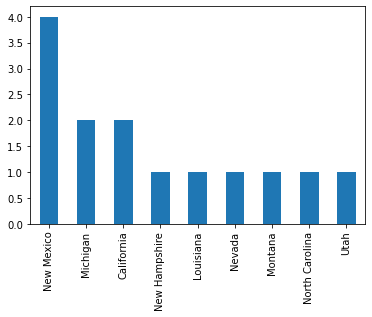

In [17]:
#Wort state by danger level counts
df_danger = pd.concat([danger_levels_picloram,
                       danger_levels_asbestos,
                       danger_levels_pcb,
                       danger_levels_oxamyl,
                       danger_levels_flouride,
                       danger_levels_mercury,
                       danger_levels_selenium,
                       danger_levels_arsenic])

df_danger.dropna(subset=['State'], how='all', inplace=True)
danger_states = df_danger['State'].value_counts()
danger_states.plot(kind='bar')
plt.show()

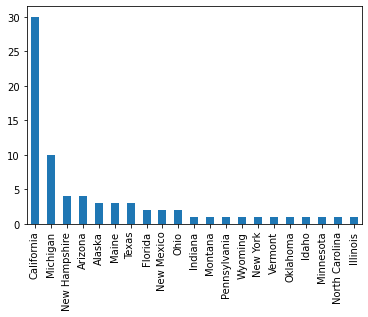

In [18]:
df_ext_caution = pd.concat([ext_caution_levels_picloram,
                       ext_caution_levels_asbestos,
                       ext_caution_levels_pcb,
                       ext_caution_levels_oxamyl,
                       ext_caution_levels_flouride,
                       ext_caution_levels_mercury,
                       ext_caution_levels_selenium,
                       ext_caution_levels_arsenic])

df_ext_caution.dropna(subset=['State'], how='all', inplace=True)
ext_caution_states = df_ext_caution['State'].value_counts()
ext_caution_states.plot(kind='bar')
plt.show()

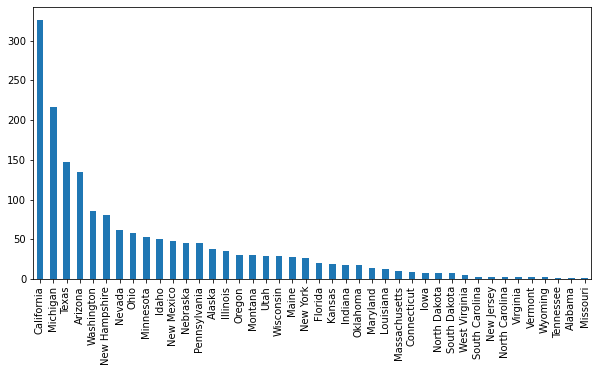

In [27]:
df_caution = pd.concat([caution_levels_picloram,
                       caution_levels_asbestos,
                       caution_levels_pcb,
                       caution_levels_oxamyl,
                       caution_levels_flouride,
                       caution_levels_mercury,
                       caution_levels_selenium,
                       caution_levels_arsenic])

df_caution.dropna(subset=['State'], how='all', inplace=True)
caution_states = df_caution['State'].value_counts()
caution_states.plot(kind='bar',figsize=(10,5))
plt.show()

In [31]:
clean_columns['State'].value_counts()


California              22734
Texas                   21792
Florida                 19082
New York                18667
North Carolina          17977
Washington              15760
Michigan                15031
Wisconsin               12807
Pennsylvania            12338
Ohio                     9855
Connecticut              9743
Missouri                 8958
Louisiana                8648
Illinois                 8456
Indiana                  8358
Virginia                 8144
Oregon                   7986
New Hampshire            7865
Arizona                  7693
New Jersey               7194
Minnesota                7193
New Mexico               5814
Montana                  5250
Nebraska                 4641
Massachusetts            4455
Idaho                    4449
Maine                    4318
Maryland                 3678
Utah                     3663
Arkansas                 3591
South Carolina           3210
Alabama                  3033
Vermont                  2979
Oklahoma  